# Statistická práce: Prodej automobilů

## Data
Zdrojová data jsou stažena databanky https://www.kaggle.com/datasets, kde jsem si vybral dataset [Car Sales](https://www.kaggle.com/datasets/ekibee/car-sales-information?resource=download) obsahující data z prodejů aut, jmenovitě značku prodaných aut, stáří, cenu, najeté kilometry a další. Data jsou získána z populární ruské auto-bazarové stránky, která je výborným zdrojem dat pro zkoumání trhu s vozidly.

Zdroj jsem si vybral mimo jiné proto, že se o automobily zajímám a již několikrát jsem vozidlo bazarově prodával nebo kupoval a vždy jsem se zajímal, jaká je reálná cena daného automobilu. Zároveň je toto téma velmi aktuální, protože se v současné době v České republice prodává velké množství ojetých vozidel a dobrá znalost trhu je pro kupujícího i prodávajícího velmi důležitá.

## Cíl práce
Pomocí lineární regrese ověřím, zdali se prodejní cena snižnuje úměrně se stářím vozidla, tedy resp. zdali existuje nepřímá úměra mezi stářím vozidla a jeho prodejní cenou. Stáří automobilu bude chápáno dvojím způsobem: jednou jako datumové stáří, podruhé jako celkový počet ujetých kilometrů.

## Lineární regrese - ověření nepřímé úměry mezi cenou a stářím
Nejdříve si načteme data z CSV souboru a zobrazíme si jejich strukturu. Následně si vybereme pouze sloupce, které nás budou zajímat, tedy `price`, `age`, `mileage` (`brand` a `name`). Z těchto sloupců si vytvoříme nový DataFrame, který bude obsahovat pouze sloupce, nad kterým budeme nadále pracovat. Jako vzorovů vůz si vyberu BMW X5 a Mercedes-Benz S-Class, které považuji za poměrně často prodávaná bazarová auta.

## Vizualizace dat

In [245]:
## definitios
import pandas as pd
import numpy as np
import seaborn as sns

## human readable numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1, color_codes=True)

In [246]:
WholeData = pd.read_csv('data/cars.csv')

## show all possible columns
WholeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1513200 non-null  object 
 1   name                  1513200 non-null  object 
 2   bodyType              1513200 non-null  object 
 3   color                 1403466 non-null  object 
 4   fuelType              1509640 non-null  object 
 5   year                  1102226 non-null  float64
 6   mileage               1498720 non-null  float64
 7   transmission          1510135 non-null  object 
 8   power                 1492313 non-null  float64
 9   price                 1513200 non-null  int64  
 10  vehicleConfiguration  1102226 non-null  object 
 11  engineName            1101142 non-null  object 
 12  engineDisplacement    1092435 non-null  object 
 13  date                  1513200 non-null  object 
 14  location              1513200 non-

In [247]:
## Since data source is from 2022, the age of the car is calculated as 2022 - year
customConverter = {'getAge': lambda x: (2022 - int(float(x))) if x != '' else np.nan, 'toNumber': lambda x: int(float(x)) if x != '' else np.nan}

## reduction to columns of interest
YearPriceDF = pd.read_csv('data/cars.csv', usecols=['year','mileage','price','brand','name'], converters={'year':customConverter['getAge'], 'price':customConverter['toNumber']}).dropna().rename(columns={'year':'age'})

# ## reduction to cars younger than 30 years
YearPriceDF = YearPriceDF[YearPriceDF['age'] < 30]

Nyní si vybereme automobil `BMW X5` a zobrazíme si velikost dat a jejich základní statistiku. Níže pak zobrazíme grafy, které nám ukáží rozložení dat a jejich korelaci.

In [248]:
## pick specific car
YearPriceDF_BMW = YearPriceDF[YearPriceDF['brand'] == 'BMW']
YearPriceDF_BMW_X5 = YearPriceDF_BMW[YearPriceDF_BMW['name'] == 'X5']

## show all possible columns
YearPriceDF_BMW_X5.info()

## basic statistics
YearPriceDF_BMW_X5.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 268 to 1512843
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    3269 non-null   object 
 1   name     3269 non-null   object 
 2   age      3269 non-null   float64
 3   mileage  3269 non-null   float64
 4   price    3269 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 153.2+ KB


age    mileage        price
count 3269.000   3269.000     3269.000
mean     8.899 110590.089  4985671.145
std      6.186  87815.786  4057037.092
min      2.000   1000.000   250000.000
25%      4.000  37000.000  1400000.000
50%      6.000  90000.000  3950000.000
75%     16.000 160000.000  7150000.000
max     23.000 352000.000 16900000.000

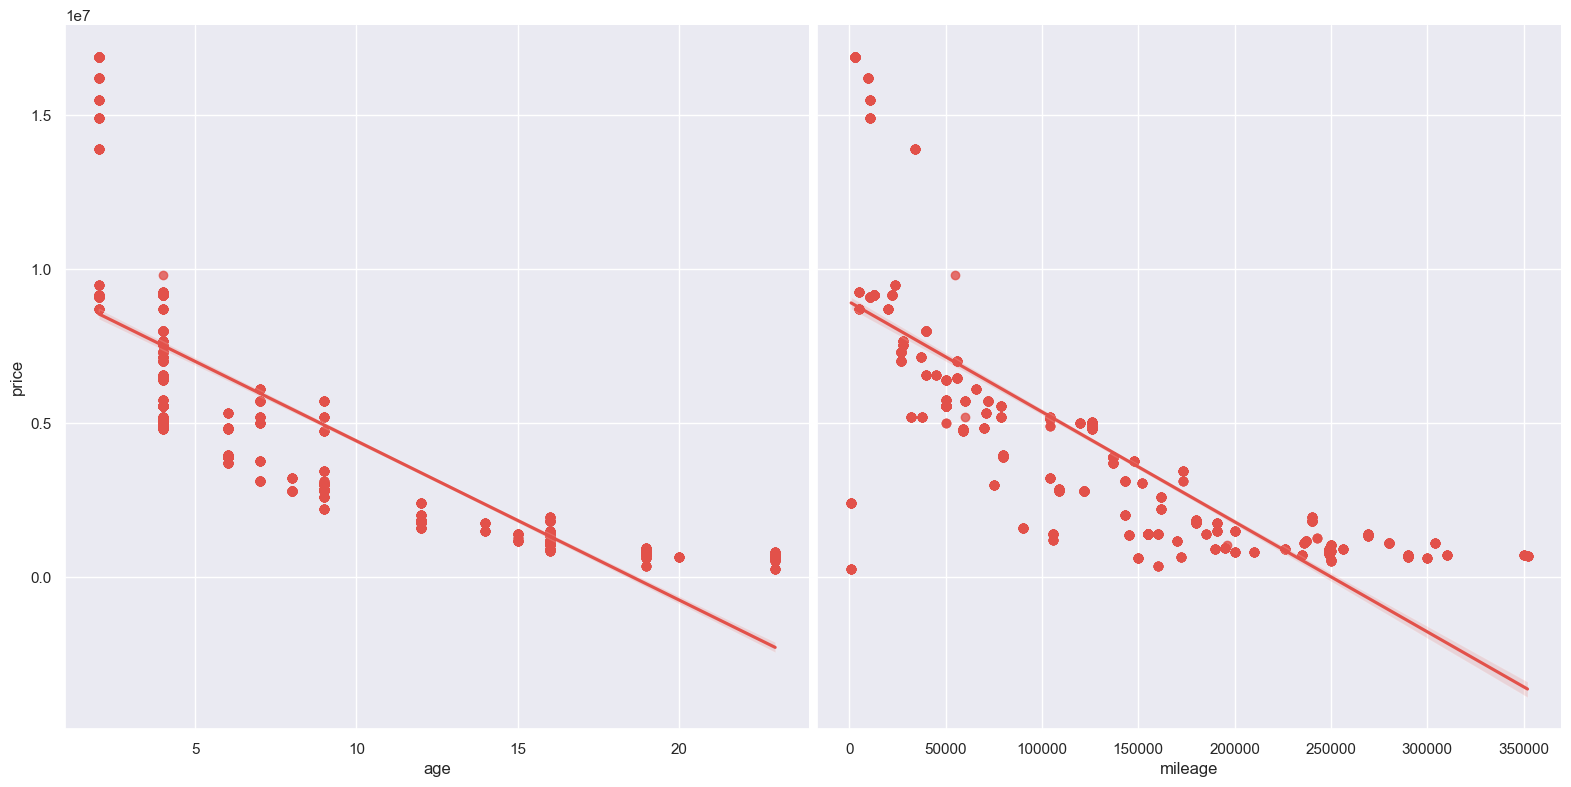

In [249]:
p = sns.pairplot(YearPriceDF_BMW_X5, x_vars=['age', 'mileage'], y_vars='price', height=8, kind='reg', aspect=1)

In [250]:
from scipy import stats

price = np.array(YearPriceDF_BMW_X5[["price"]]).reshape(-1)
age = np.array(YearPriceDF_BMW_X5[["age"]]).reshape(-1)
mileage = np.array(YearPriceDF_BMW_X5[["mileage"]]).reshape(-1)

slope, intercept, r_value, p_value, std_err = stats.linregress(age, price)

print()
print("Age / Price")
print(f"koeficient determinace: {r_value * r_value:.3f}")
print(f"p-hodnota: {p_value:.5f}")
print(f"sklon: {slope:.3f} -> v CZK: {slope * 0.24:.3f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(mileage, price)

print()
print("Mileage / Price")
print(f"koeficient determinace: {r_value * r_value:.3f}")
print(f"p-hodnota: {p_value:.5f}")
print(f"sklon: {slope:.3f} -> v CZK: {slope * 0.24:.3f}")


Age / Price
koeficient determinace: 0.619
p-hodnota: 0.00000
sklon: -516057.576 -> v CZK: -123853.818

Mileage / Price
koeficient determinace: 0.599
p-hodnota: 0.00000
sklon: -35.749 -> v CZK: -8.580


To stejné provedeme pro automobil `Mercedes-Benz S-Class`.

In [251]:
YearPriceDF_MB = YearPriceDF[YearPriceDF['brand'] == 'Mercedes-Benz']
YearPriceDF_MB_Sclass = YearPriceDF_MB[YearPriceDF_MB['name'] == 'S-Class']

## show all possible columns
YearPriceDF_MB_Sclass.info()

## basic statistics
YearPriceDF_MB_Sclass.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 323 to 1512784
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    4033 non-null   object 
 1   name     4033 non-null   object 
 2   age      4033 non-null   float64
 3   mileage  4033 non-null   float64
 4   price    4033 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 189.0+ KB


age    mileage        price
count 4033.000   4033.000     4033.000
mean     9.720 105483.015  3685761.831
std      6.298  62897.843  3200848.072
min      1.000   1000.000   400000.000
25%      4.000  70000.000  1490000.000
50%      7.000 100000.000  3750000.000
75%     16.000 128000.000  3990000.000
max     27.000 460000.000 21000000.000

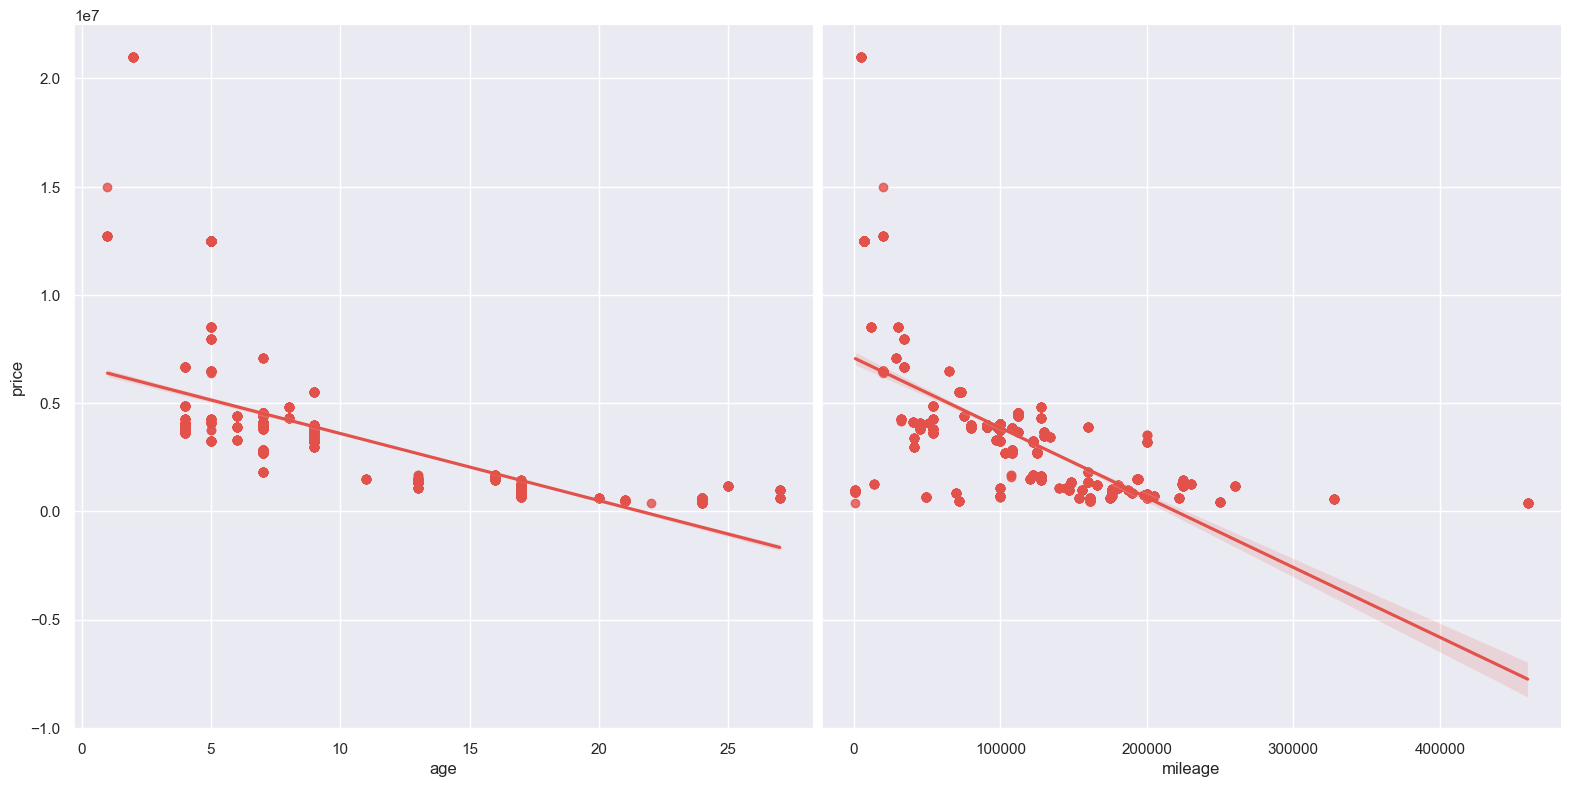

In [252]:
p = sns.pairplot(YearPriceDF_MB_Sclass, x_vars=['age', 'mileage'], y_vars='price', height=8, kind='reg', aspect=1)

In [253]:
from scipy import stats

price = np.array(YearPriceDF_MB_Sclass[["price"]]).reshape(-1)
age = np.array(YearPriceDF_MB_Sclass[["age"]]).reshape(-1)
mileage = np.array(YearPriceDF_MB_Sclass[["mileage"]]).reshape(-1)

slope, intercept, r_value, p_value, std_err = stats.linregress(age, price)

print()
print("Age / Price")
print(f"koeficient determinace: {r_value * r_value:.3f}")
print(f"p-hodnota: {p_value:.5f}")
print(f"sklon: {slope:.3f} -> v CZK: {slope * 0.24:.3f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(mileage, price)

print()
print("Mileage / Price")
print(f"koeficient determinace: {r_value * r_value:.3f}")
print(f"p-hodnota: {p_value:.5f}")
print(f"sklon: {slope:.3f} -> v CZK: {slope * 0.24:.3f}")



Age / Price
koeficient determinace: 0.371
p-hodnota: 0.00000
sklon: -309744.856 -> v CZK: -74338.765

Mileage / Price
koeficient determinace: 0.402
p-hodnota: 0.00000
sklon: -32.262 -> v CZK: -7.743


# Závěr
Jelikož je p-hodnota u obou měření opravdu velmi malá a pod úrovní významnosti, tak můžeme tvrdit, že veličiny jsou mezi sebou závislé. Zároveň u obou měření je relativně podobný sklon regrese, tedy závislost mezi cenou a stářím je u obou měření podobná. 

Rozhodně z uvedených dat výše můžeme tvrdit, že cena automobilu klesá s jeho stářím a to jak s jeho datem výroby, tak s počtem najetých kilometrů. Sklon regrese nám zároveň přímo říká, jak moc se cena snižuje s každým rokem stáří, resp. ujetým kilometrem.

Zároveň u obou měření vyšel koeficient determinance velmi silně, (~60% u BMW X5 a ~40% u Mercedes-Benz S-Class), což nám dovoluje tvrdit, že závislost mezi cenou a stářím je silná.

Osobně nejzajímavější je pro mě hodnota sklonu u měření Mileage / Price, která přímo udává, jak auto ztrácí hodnotu každým najetým kilometrem a ukazuje, jak drahý je ve skutečnosti provoz automobilu (~ 8 Kč / kilometr). Jako další zajímavost bych zmínil pozorování, že zjevně automobil Mercedes-Benz S-Class daleko méně ztrácí na hodnotě vzhledem ke stáří oproti nájezdu. Tudíž by i starší automobil s malým nájezdem měl velký potenciál při prodeji. Naopak u BMW X5 jsou oba koeficienty sklonu velmi podobné, čili oba parametry stáří jsou pro prodávajícího důležité.